<a href="https://colab.research.google.com/github/Rampriya92/CURIOSITY-PROJECT/blob/main/ecog_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#import libraries
import numpy as np
import os, requests
from matplotlib import pyplot as plt


fname = 'faceshouses.npz'
url = "https://osf.io/argh7/download"
if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)




In [52]:
alldat = np.load(fname, allow_pickle=True)['dat']
alldat.shape


# select just one of the recordings here. 
dat1 = alldat[1][0]
dat2 = alldat[1][1]
print(dat1.keys())
print(dat2.keys())


dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs'])
dict_keys(['stim_id', 'stim_cat', 'stim_noise', 't_on', 't_off', 'key_press', 'V', 'categories', 'scale_uv', 'locs'])


**AVERAGE BROADBAND POWER FOR FACE AND HOUSE STIMULI ( LOCALIZER TASK)**

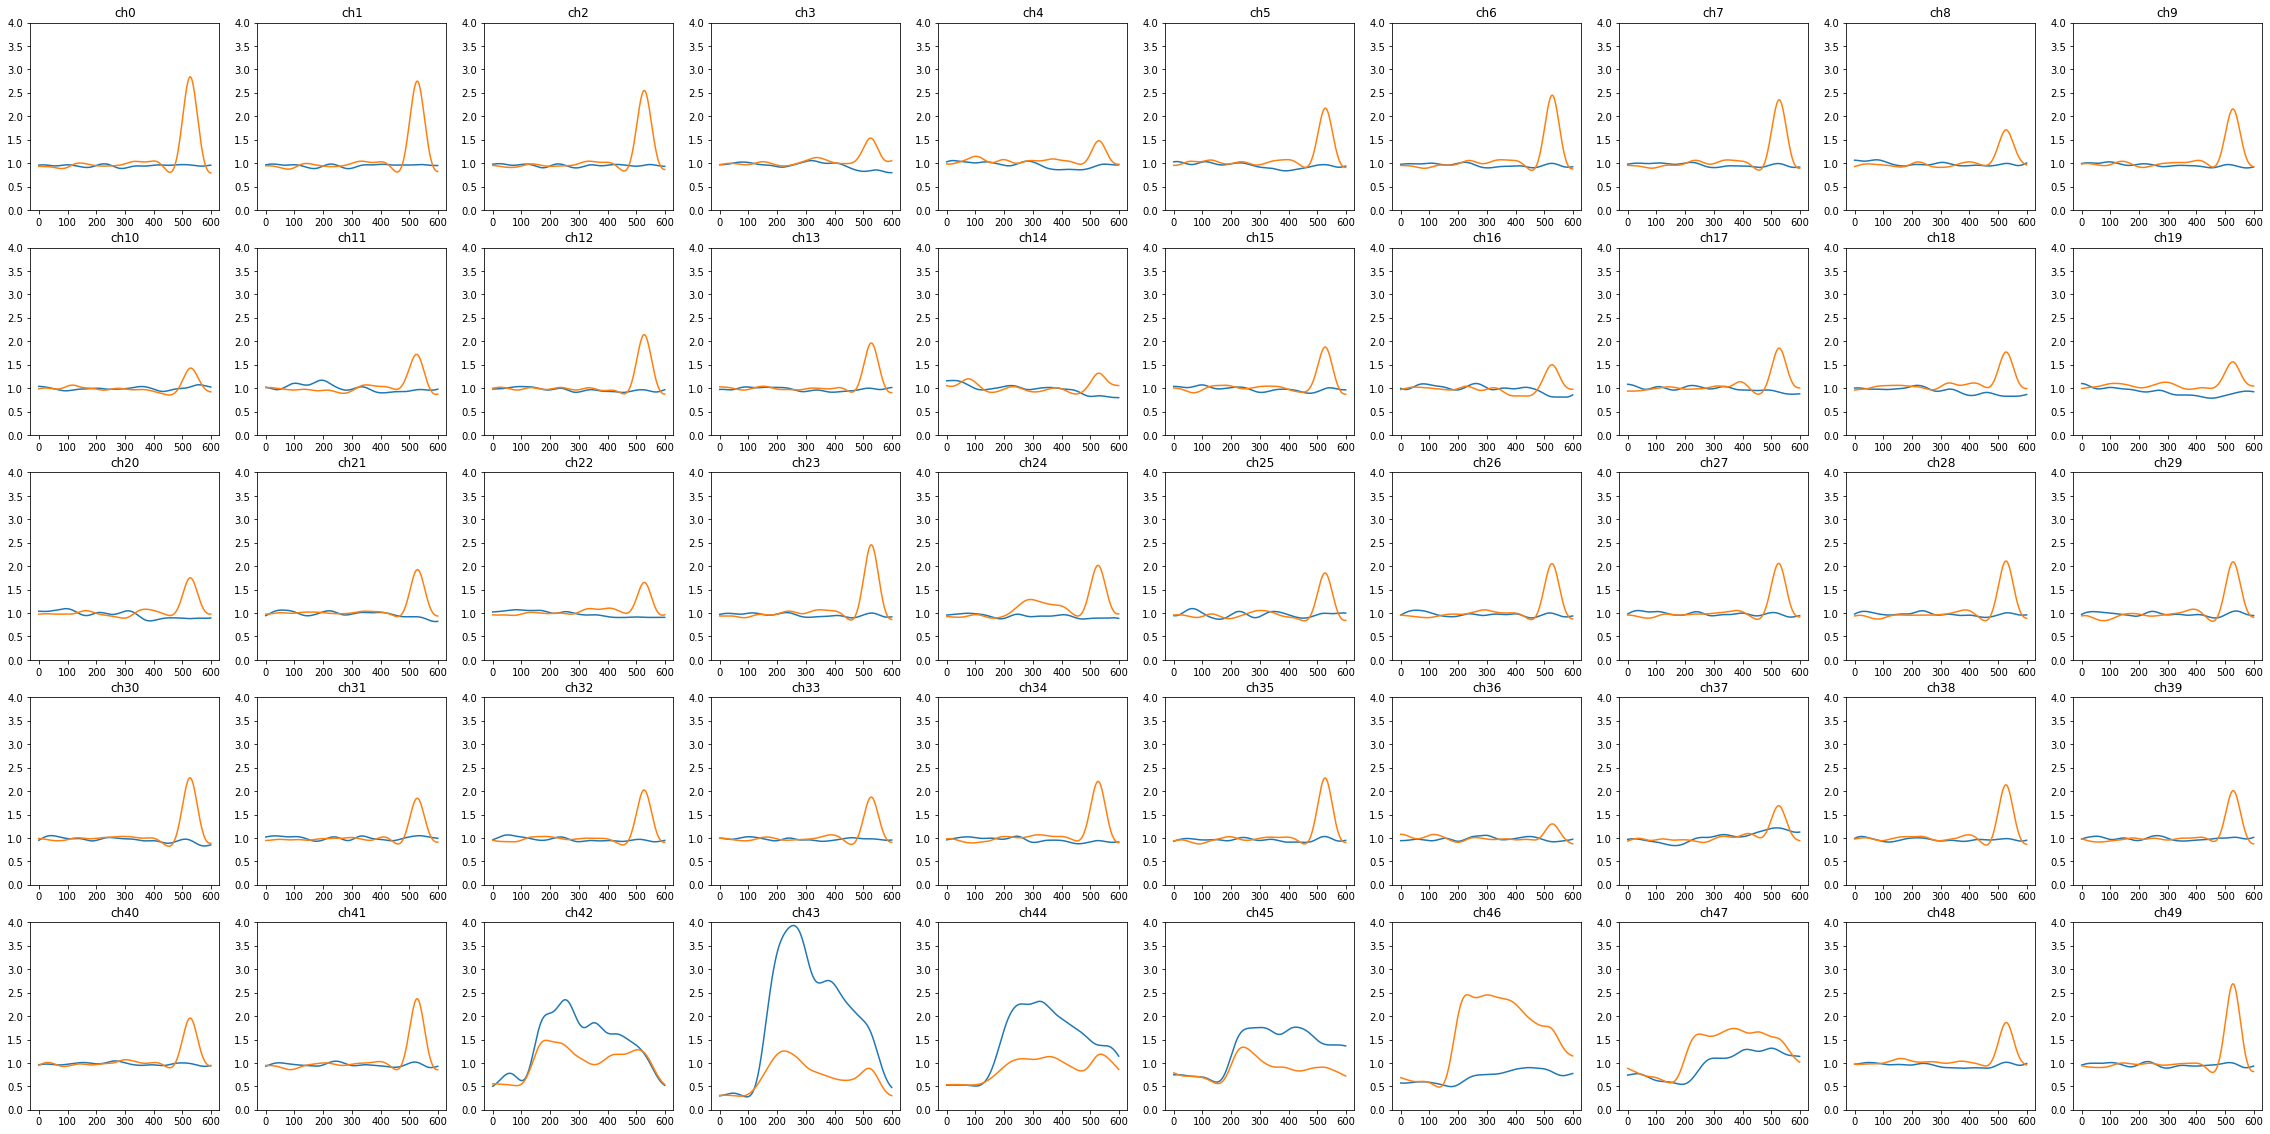

In [57]:
#Broadband power
V = dat1['V'].astype('float32')
b, a = signal.butter(3, [50], btype = 'high', fs=1000)
V = signal.filtfilt(b,a,V,0)
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype = 'low', fs=1000)
V = signal.filtfilt(b,a,V,0)
V = V/V.mean(0)

#creating epoch
nt, nchan = V.shape
nstim_1 = len(dat1['t_on'])
trange = np.arange(0,600)
ts_1 = dat1['t_on'][:,np.newaxis] + trange
V_epochs_1 = np.reshape(V[ts_1, :], (nstim_1, 600, nchan))
V_house_1 = (V_epochs_1[dat1['stim_id']<=50]).mean(0)
V_face_1 = (V_epochs_1[dat1['stim_id']>50]).mean(0)

#PLOTTING

plt.figure(figsize=(40,20))
for j in range(50):
  ax = plt.subplot(5,10,j+1)
  plt.plot(trange, V_house_1[:,j])
  plt.plot(trange, V_face_1[:,j])
  plt.title('ch%d'%j)
  plt.xticks([0,100,200,300,400,500,600])
  plt.ylim([0, 4])


  #channel 40 shows effect for houses in data 1

Broadband plot for channel 30

(0.0, 600.0)

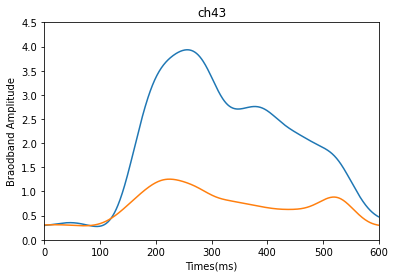

In [59]:
#PLOTTING for channel 40
plt.figure()
plt.plot(trange, V_house_1[:,43])
plt.plot(trange, V_face_1[:,43])
plt.title('ch%d'%43)
plt.xlabel('Times(ms)')
plt.ylabel('Braodband Amplitude')
plt.xticks([0,100,200,300,400,500,600])
plt.ylim([0, 4.5])
plt.xlim([0,600])




**PLOTTING BROADBAND POWER ACROSS ALL STIMULI FOR DATA2 (face detection condition)**

In [55]:
# PLOTTING BROADBAND POWER FOR DATA2 (face detection condition)
from scipy import signal

#Broadband power
V = dat2['V'].astype('float32')
b, a = signal.butter(3, [50], btype = 'high', fs=1000)
V = signal.filtfilt(b,a,V,0)
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype = 'low', fs=1000)
V = signal.filtfilt(b,a,V,0)
V = V/V.mean(0)

#AVERAGE BROADBAND POWER ACROSS  STIMULI WITH ZERO NOISE
nt, nchan = V.shape
nstim_2 = len(dat2['t_on'])
houses=(dat2['stim_cat']==1)
faces=(dat2['stim_cat']==2)
#stim_noise=(dat2['stim_noise']==0)
stim_noise=dat2['stim_noise']


#Epoch around t_on
trange = np.arange(-200, 400)
ts = dat2['t_on'][:,np.newaxis] + trange
V_epochs_2 = np.reshape(V[ts, :], (nstim_2, 600, nchan))



for [i] in stim_noise:
  if [i]==0: #ERROR :The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
      v_house_2 = (V_epochs_2[houses]).mean(0)
      v_face_2  = (V_epochs_2[faces]).mean(0)

#PLOTTING
      plt.figure(figsize=(40,20))
      for j in range(50):
        ax = plt.subplot(5,10,j+1)
        plt.plot(trange, v_house_2[:,j])
        plt.plot(trange, v_face_2[:,j])
        plt.title('ch%d'%j)
        plt.xticks([-200, 0, 200])
        plt.ylim([0, 4])



